In [1]:
import os
os.getcwd()

'C:\\Users\\SRADHA\\Desktop\\Projects\\Unsupervised Machine Learning'

In [2]:
# Import basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import dataset
dataset=pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Data Preprocessing

In [4]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# Storing the data with Annual Income and Spending Score for data mining.
x = dataset.iloc[:,3:].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# K-Means Clustering

In [7]:
from sklearn.cluster import KMeans

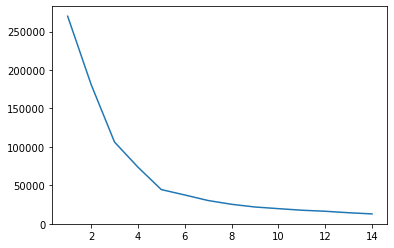

In [8]:
wcss = []

for i in range(1,15):
    kmeans = KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,15), wcss)

In [9]:
kmeans.inertia_

12797.675817809642

In [10]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37442.24745037571,
 30227.606513152015,
 25315.54182271217,
 21794.8856090982,
 19653.383606248826,
 17602.19046838677,
 16246.86461091091,
 14340.0216112635,
 12797.675817809642]

In [11]:
kmeans = KMeans(n_clusters=5,init='k-means++') # As per Elbow method, we have too use best k=5

In [12]:
kmeans

KMeans(n_clusters=5)

In [13]:
y_kmeans=kmeans.fit_predict(x)

In [14]:
y_kmeans

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 2,
       1, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 0, 2, 0, 3, 0, 3, 0,
       2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

In [15]:
# Appending the cluster value into original dataset
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
combined=pd.concat([dataset,pd.DataFrame(y_kmeans)],axis=1)

In [17]:
# Exporting the dataset
combined.to_csv('new_dataset_cluster.csv')

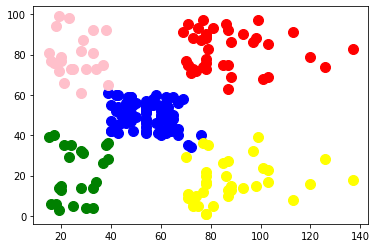

In [18]:
# Visualization
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='Cluster0')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='green',label='Cluster1')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='blue',label='Cluster2')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=100,c='yellow',label='Cluster3')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=100,c='pink',label='Cluster4')

# Hierarchical Cluster

In [19]:
import scipy.cluster.hierarchy as sch

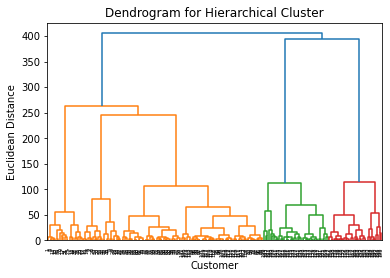

In [20]:
dendrogram=sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendrogram for Hierarchical Cluster')
plt.xlabel('Customer')
plt.ylabel('Euclidean Distance')
plt.show()

In [21]:
# K=5 as per Dendrogram
from sklearn.cluster import AgglomerativeClustering

In [22]:
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(x)

In [23]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [24]:
combined_1=pd.concat([dataset,pd.DataFrame(y_hc)],axis=1)

In [25]:
combined_1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),0
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [26]:
combined_1.to_csv('hierarchical_output.csv')

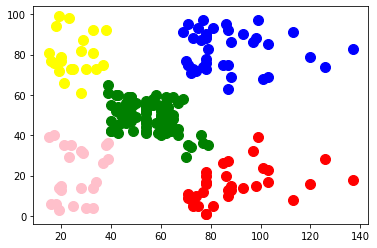

In [27]:
plt.scatter(x[y_hc==0,0],x[y_hc==0,1],s=100,c='red',label='Cluster0')
plt.scatter(x[y_hc==1,0],x[y_hc==1,1],s=100,c='green',label='Cluster1')
plt.scatter(x[y_hc==2,0],x[y_hc==2,1],s=100,c='blue',label='Cluster2')
plt.scatter(x[y_hc==3,0],x[y_hc==3,1],s=100,c='yellow',label='Cluster3')
plt.scatter(x[y_hc==4,0],x[y_hc==4,1],s=100,c='pink',label='Cluster4')